In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pwd

'C:\\Users\\Gopika Gopan G\\Desktop\\tor\\training'

In [3]:
dataset = pd.read_excel('flood dataset.xlsx')

# univariate analysis

C:\Users\Gopika Gopan G\AppData\Local\Temp\ipykernel_784\210191982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(dataset["Temp"]))


Axes(0.125,0.11;0.775x0.77)


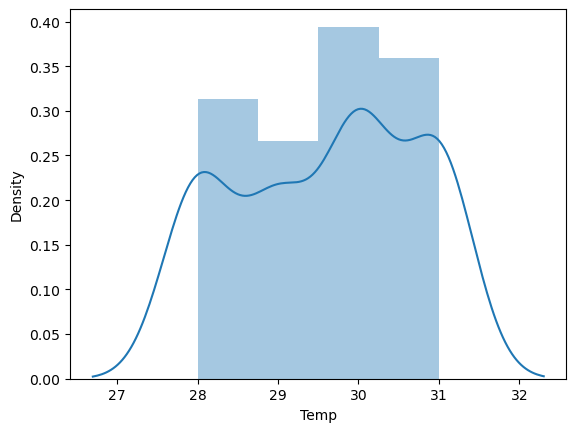

In [4]:
print(sns.distplot(dataset["Temp"]))

Axes(0.125,0.11;0.775x0.77)


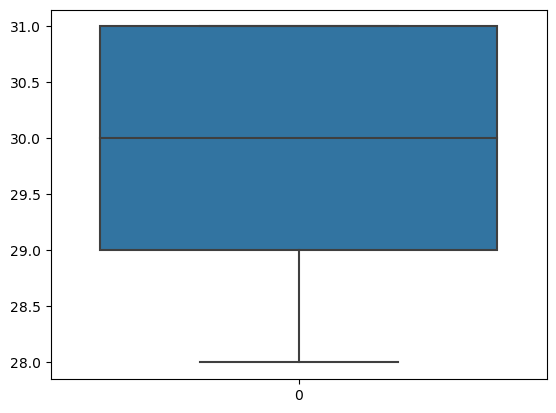

In [5]:
print(sns.boxplot(dataset['Temp']))

# multivariate analysis

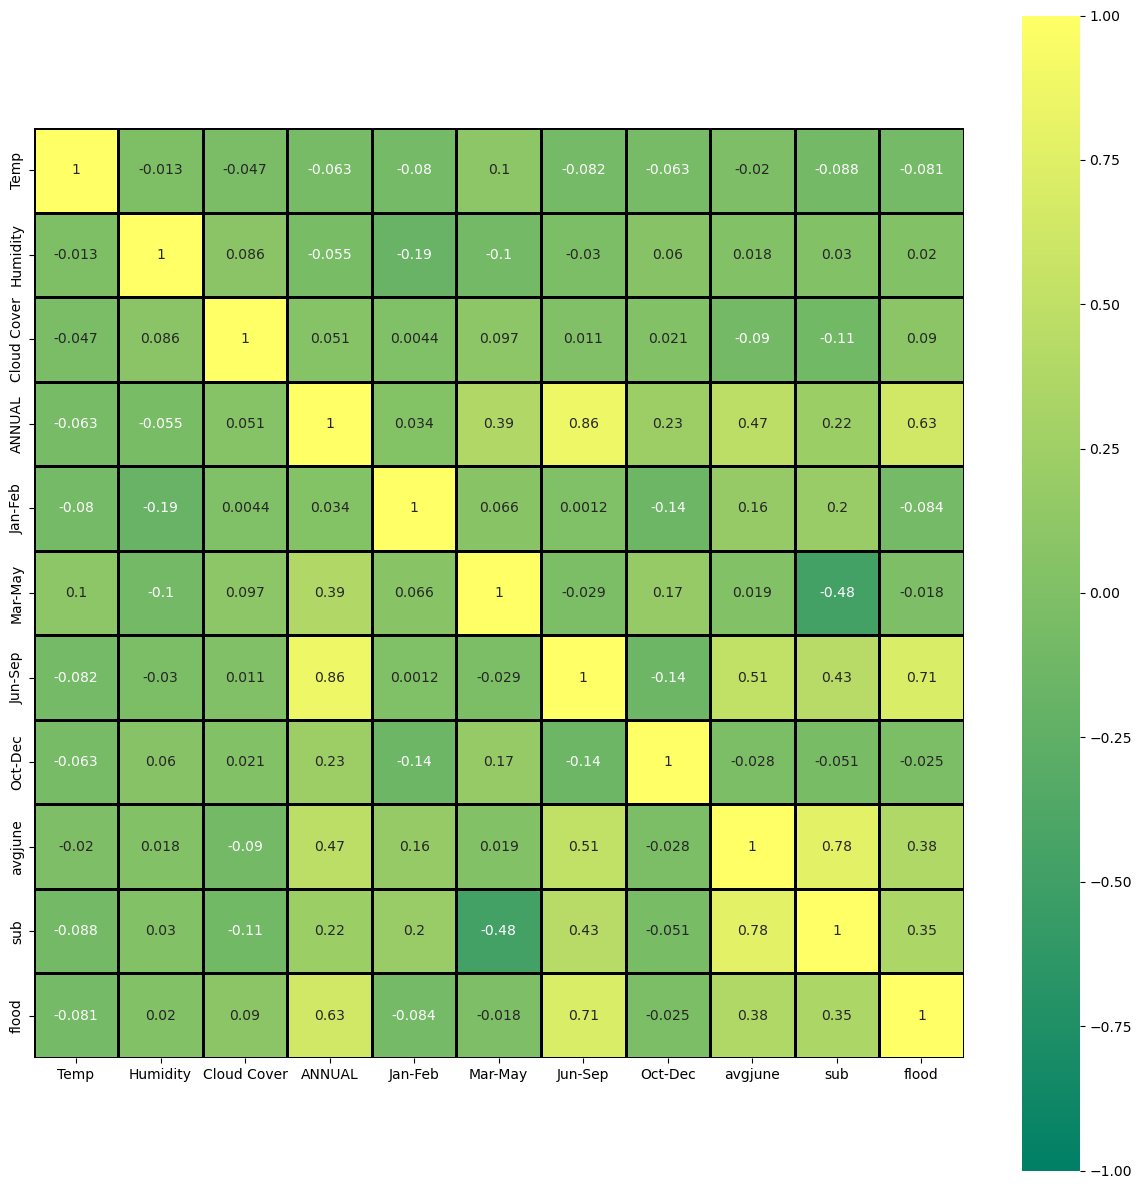

In [6]:
#heat map
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(dataset.corr(),annot=True,cmap='summer',
               linewidths=1,linecolor='k',square=True,
               mask=False, vmin=-1, vmax=1,
               cbar_kws={"orientation": "vertical"},cbar=True)

# Descriptive Analysis

In [7]:
dataset.drop(["Oct-Dec"],axis=1,inplace=True)

In [8]:
dataset.head(10)

Temp  Humidity  Cloud Cover  ANNUAL  Jan-Feb  Mar-May  Jun-Sep     avgjune  \
0    29        70           30  3248.6     73.4    386.2   2122.8  274.866667   
1    28        75           40  3326.6      9.3    275.7   2403.4  130.300000   
2    28        75           42  3271.2     21.7    336.3   2343.0  186.200000   
3    29        71           44  3129.7     26.7    339.4   2398.2  366.066667   
4    31        74           40  2741.6     23.4    378.5   1881.5  283.400000   
5    30        70           38  2708.0     34.1    230.0   1943.1  138.300000   
6    29        74           40  3671.1     23.7    328.0   2737.8  256.966667   
7    30        78           36  2648.3     28.8    283.7   2023.6  197.533333   
8    30        71           40  3050.2     65.9    628.3   1940.4  234.900000   
9    30        70           34  2848.6     28.4    296.7   1886.5  226.666667   

     sub  flood  
0  649.9      0  
1  256.4      1  
2  308.9      0  
3  862.5      0  
4  586.9      0  
5  254.1      0  
6  669.5      1  
7  450.0      0  
8  231.5      0  
9  531.2      0

In [9]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   avgjune      115 non-null    float64
 8   sub          115 non-null    float64
 9   flood        115 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 9.1 KB
None


In [10]:
dataset.describe().T

count         mean         std     min          25%          50%  \
Temp         115.0    29.600000    1.122341    28.0    29.000000    30.000000   
Humidity     115.0    73.852174    2.947623    70.0    71.000000    74.000000   
Cloud Cover  115.0    36.286957    4.330158    30.0    32.500000    36.000000   
ANNUAL       115.0  2925.487826  422.112193  2068.8  2627.900000  2937.500000   
Jan-Feb      115.0    27.739130   22.361032     0.3    10.250000    20.500000   
Mar-May      115.0   377.253913  151.091850    89.9   276.750000   342.000000   
Jun-Sep      115.0  2022.840870  386.254397  1104.3  1768.850000  1948.700000   
avgjune      115.0   218.100870   62.547597    65.6   179.666667   211.033333   
sub          115.0   439.801739  210.438813    34.2   295.000000   430.600000   
flood        115.0     0.139130    0.347597     0.0     0.000000     0.000000   

                     75%          max  
Temp           31.000000    31.000000  
Humidity       76.000000    79.000000  
Cloud Cover    40.000000    44.000000  
ANNUAL       3164.100000  4257.800000  
Jan-Feb        41.600000    98.100000  
Mar-May       442.300000   915.200000  
Jun-Sep      2242.900000  3451.300000  
avgjune       263.833333   366.066667  
sub           577.650000   982.700000  
flood           0.000000     1.000000

# Handling the mising values

In [11]:
dataset.isnull().any()

Temp           False
Humidity       False
Cloud Cover    False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
avgjune        False
sub            False
flood          False
dtype: bool

# splitting the dataset into dependent and independent variables

In [12]:
X = dataset.iloc[:,2:7].values

In [13]:
y = dataset.iloc[:,9:].values

# split the Dataset into Train set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [15]:
X_train.shape

(86, 5)

In [16]:
X_test.shape

(29, 5)

# Feature scaling

In [17]:
#import Standardscaler
from sklearn.preprocessing import StandardScaler
#create object to standardScaler class
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [18]:
from joblib import dump
dump(sc,"transform.sav")

['transform.sav']

# Evaluating Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

In [22]:
from sklearn.metrics import accuracy_score,classification_report

In [23]:
y_predict = model.predict(X_test)
y_predict_train=model.predict(X_train)

# Accuracy score

In [24]:
print('Test data',accuracy_score(y_test.ravel(),y_predict))
print('Train data',accuracy_score(y_train.ravel(),y_predict_train))

Test data 0.9655172413793104
Train data 1.0


# Confusion matrix

In [25]:
pd.crosstab(y_test.ravel(),y_predict)

col_0   0  1
row_0       
0      25  1
1       0  3

# Classification report

In [26]:
print(classification_report(y_test.ravel(), y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.75      1.00      0.86         3

    accuracy                           0.97        29
   macro avg       0.88      0.98      0.92        29
weighted avg       0.97      0.97      0.97        29



# Random forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier()
model.fit(X_train,y_train.ravel())

RandomForestClassifier()

In [29]:
from sklearn.metrics import accuracy_score,classification_report

In [30]:
y_predict = model.predict(X_test)
y_predict_train=model.predict(X_train)

# Accuracy score

In [31]:
print('Test data',accuracy_score(y_test.ravel(),y_predict))
print('Train data',accuracy_score(y_train.ravel(),y_predict_train))

Test data 0.9655172413793104
Train data 1.0


# Confusion matrix

In [32]:
pd.crosstab(y_test.ravel(),y_predict)

col_0   0  1
row_0       
0      25  1
1       0  3

# Classification report

In [33]:
print(classification_report(y_test.ravel(), y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.75      1.00      0.86         3

    accuracy                           0.97        29
   macro avg       0.88      0.98      0.92        29
weighted avg       0.97      0.97      0.97        29



# KNN model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train,y_train.ravel())

KNeighborsClassifier()

In [35]:
y_predict=knn.predict(X_test)
y_pred=knn.predict(X_train)

In [36]:
from sklearn.metrics import accuracy_score,classification_report

print("Test accuracy=", accuracy_score(y_test,y_predict))
print("Train accuracy=", accuracy_score(y_train,y_pred))


Test accuracy= 0.896551724137931
Train accuracy= 0.9418604651162791


In [37]:
pd.crosstab(y_test.ravel(),y_predict)

col_0   0  1
row_0       
0      23  3
1       0  3

In [38]:
print(classification_report(y_test.ravel(),y_predict))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.50      1.00      0.67         3

    accuracy                           0.90        29
   macro avg       0.75      0.94      0.80        29
weighted avg       0.95      0.90      0.91        29



# Xgboost model 

In [39]:
from xgboost import XGBClassifier

In [40]:
xgb = XGBClassifier()

In [41]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
y_predict=xgb.predict(X_test)
y_pred=xgb.predict(X_train)

In [43]:
from sklearn.metrics import accuracy_score,classification_report

print("Test accuracy=", accuracy_score(y_test,y_predict))
print("Train accuracy=", accuracy_score(y_train,y_pred))


Test accuracy= 0.9655172413793104
Train accuracy= 1.0


In [44]:
pd.crosstab(y_test.ravel(),y_predict)

col_0   0  1
row_0       
0      25  1
1       0  3

In [45]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.75      1.00      0.86         3

    accuracy                           0.97        29
   macro avg       0.88      0.98      0.92        29
weighted avg       0.97      0.97      0.97        29



In [46]:
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
import xgboost

In [47]:
dtree = tree.DecisionTreeClassifier()
Rf = ensemble.RandomForestClassifier()
knn = neighbors.KNeighborsClassifier()
xgb = xgboost.XGBClassifier()

In [48]:
dtree = tree.DecisionTreeClassifier()
Rf.fit(X_train,y_train.ravel())
knn.fit(X_train,y_train.ravel())
xgb.fit(X_train,y_train.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# compare the model

In [49]:
from sklearn import metrics

In [50]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))

0.9655172413793104
0.9655172413793104
0.9655172413793104
0.9655172413793104


# evaluating the performance of the model

In [51]:
metrics.confusion_matrix(y_test,y_predict)

array([[25,  1],
       [ 0,  3]], dtype=int64)

In [52]:
print(metrics.accuracy_score(y_test,y_predict))

0.9655172413793104


In [53]:
print(metrics.precision_score(y_test,y_predict))

0.75


In [54]:
print(metrics.recall_score(y_test,y_predict))

1.0


# saving the model

In [55]:
from joblib import dump

In [56]:
dump(xgb,'floods.sav')

['floods.sav']